In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona
import geopandas as gpd # Generalmente la librería geopandas se abrevia gpd

In [5]:
puntos = gpd.read_file('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg')

/workspaces/codespaces-jupyter/.conda/lib/python3.9/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg': 'enteric-fermentation-cattle-pasture-emissions-june-2024' (default), 'mexico', 'mexico-estados'. Specify layer parameter to avoid this warning.
  result = read_func(


In [6]:
layers = fiona.listlayers('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg')
print(layers)

['enteric-fermentation-cattle-pasture-emissions-june-2024', 'mexico', 'mexico-estados']


In [7]:
puntos.head()

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,other1,other2,native_source_id,geometry
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552)
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239)
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323)
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054)
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399)


In [8]:
estados =  gpd.read_file('enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='mexico-estados')

In [9]:
estados.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Aguascalientes,MX-AGU,31927357B17004778023462,MEX,ADM1,"MULTIPOLYGON (((-101.86167 22.02888, -101.8605..."
1,Baja California,MX-BCN,31927357B35339934753022,MEX,ADM1,"MULTIPOLYGON (((-114.1288 28.01224, -114.12369..."
2,Baja California Sur,MX-BCS,31927357B33389180120223,MEX,ADM1,"MULTIPOLYGON (((-110.34078 24.28615, -110.3391..."
3,Campeche,MX-CAM,31927357B84428150771724,MEX,ADM1,"MULTIPOLYGON (((-91.55007 18.28726, -91.55272 ..."
4,Chiapas,MX-CHP,31927357B65177449444732,MEX,ADM1,"MULTIPOLYGON (((-92.77034 15.15128, -92.77328 ..."


In [10]:
print(estados.crs)
print(puntos.crs)

# Ponerlos en el mismo sistema de referencia
puntos = puntos.to_crs(estados.crs)

# Verificar que ahora sí están en el mismo sistema de referencia
print(estados.crs)
print(puntos.crs)

EPSG:4326
GEOGCS["WGS 84 (CRS84)",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH],AUTHORITY["OGC","CRS84"]]
EPSG:4326
EPSG:4326


In [11]:
municipios_con_estado = gpd.sjoin(puntos, estados, how='left', predicate='within')

In [12]:
municipios_con_estado

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,...,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,...,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,...,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,...,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,...,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,...,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,21223768,Zumpahuac�n Municipality,6/1/2024 0:00,6/30/2024 0:00,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,...,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,21223769,Zumpango Municipality,6/1/2024 0:00,6/30/2024 0:00,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,...,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,21230358,�lamo Temapache Municipality,6/1/2024 0:00,6/30/2024 0:00,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,...,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,21223772,�lvaro Obreg�n Municipality,6/1/2024 0:00,6/30/2024 0:00,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,...,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [13]:
municipios_con_estado = municipios_con_estado[municipios_con_estado['shapeName'].notna()]

In [14]:
municipios_con_estado

,source_id,source_name,start_time,end_time,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,...,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,21231494,Abal� Municipality,6/1/2024 0:00,6/30/2024 0:00,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,...,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,21217225,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,...,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,21221325,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,...,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,21223942,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,...,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,21229981,Abasolo Municipality,6/1/2024 0:00,6/30/2024 0:00,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,...,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,21223768,Zumpahuac�n Municipality,6/1/2024 0:00,6/30/2024 0:00,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,...,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,21223769,Zumpango Municipality,6/1/2024 0:00,6/30/2024 0:00,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,...,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,21230358,�lamo Temapache Municipality,6/1/2024 0:00,6/30/2024 0:00,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,...,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,21223772,�lvaro Obreg�n Municipality,6/1/2024 0:00,6/30/2024 0:00,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,...,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [15]:
# drop the first four columns by their names

cols_to_drop = municipios_con_estado.columns[:4]
municipios_con_estado = municipios_con_estado.drop(columns=cols_to_drop)

In [16]:
municipios_con_estado["shapeType"].unique()

array(['ADM1'], dtype=object)

In [17]:
municipios_con_estado["shapeGroup"].unique()

array(['MEX'], dtype=object)

In [18]:
municipios_con_estado

,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,other1,other2,native_source_id,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
0,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,MEX.31_1,MEX.31.1_2,MEX.31.1_2,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC,31927357B35199150741361,MEX,ADM1
1,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,MEX.7_1,MEX.7.1_2,MEX.7.1_2,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1
2,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,MEX.11_1,MEX.11.1_2,MEX.11.1_2,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA,31927357B33104012885361,MEX,ADM1
3,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,MEX.19_1,MEX.19.1_2,MEX.19.1_2,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE,31927357B30741484985331,MEX,ADM1
4,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,MEX.28_1,MEX.28.1_2,MEX.28.1_2,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM,31927357B88239390016047,MEX,ADM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,1315.47899,MEX.15_1,MEX.15.124_2,MEX.15.124_2,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2301,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,192.66404,MEX.15_1,MEX.15.125_2,MEX.15.125_2,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX,31927357B41082348713023,MEX,ADM1
2302,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,3161.36920,MEX.30_1,MEX.30.8_2,MEX.30.8_2,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER,31927357B5337219705256,MEX,ADM1
2303,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,1283.34804,MEX.16_1,MEX.16.3_2,MEX.16.3_2,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC,31927357B49073316106075,MEX,ADM1


In [19]:
municipios_con_estado = municipios_con_estado.drop(columns=["shapeType", "shapeGroup", "other1", "other2", "native_source_id", "shapeID"])

In [20]:
municipios_con_estado

,lat,lon,geometry_ref,emissions_quantity,activity,emissions_factor,capacity,geometry,index_right,shapeName,shapeISO
0,20.655196,-89.650384,gadm_MEX.31.1_2,8.373833,1794.39270,0.004667,1794.39270,POINT (-89.65038 20.6552),30.0,Yucatan,MX-YUC
1,27.122395,-101.245782,gadm_MEX.7.1_2,102.329782,21927.81044,0.004667,21927.81044,POINT (-101.24578 27.12239),6.0,Coahuila de Zaragoza,MX-COA
2,20.533231,-101.536012,gadm_MEX.11.1_2,14.944945,3202.48826,0.004667,3202.48826,POINT (-101.53601 20.53323),10.0,Guanajuato,MX-GUA
3,25.940543,-100.405942,gadm_MEX.19.1_2,4.950798,1060.88519,0.004667,1060.88519,POINT (-100.40594 25.94054),18.0,Nuevo Leon,MX-NLE
4,24.133989,-98.268292,gadm_MEX.28.1_2,176.682482,37860.53202,0.004667,37860.53202,POINT (-98.26829 24.13399),27.0,Tamaulipas,MX-TAM
...,...,...,...,...,...,...,...,...,...,...,...
2300,18.800117,-99.554089,gadm_MEX.15.124_2,6.138902,1315.47899,0.004667,1315.47899,POINT (-99.55409 18.80012),14.0,Mexico,MX-MEX
2301,19.809107,-99.071821,gadm_MEX.15.125_2,0.899099,192.66404,0.004667,192.66404,POINT (-99.07182 19.80911),14.0,Mexico,MX-MEX
2302,20.971187,-97.710425,gadm_MEX.30.8_2,14.753057,3161.36920,0.004667,3161.36920,POINT (-97.71043 20.97119),29.0,Veracruz de Ignacio de la Llave,MX-VER
2303,19.873537,-101.021758,gadm_MEX.16.3_2,5.988957,1283.34804,0.004667,1283.34804,POINT (-101.02176 19.87354),15.0,Michoacan de Ocampo,MX-MIC


In [21]:
# Save to geopackage 2
municipios_con_estado.to_file('2-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado', driver='GPKG')

In [22]:
# sumar por estado
temp_df = municipios_con_estado.drop(columns=["geometry", "shapeISO", "geometry_ref", "lat", "lon"])
municipios_con_estado_sum = temp_df.groupby('shapeName').mean()
municipios_con_estado_sum = municipios_con_estado_sum.reset_index()
municipios_con_estado_sum = municipios_con_estado_sum.rename(columns={"shapeName": "estado"})
municipios_con_estado_sum


,estado,emissions_quantity,activity,emissions_factor,capacity,index_right
0,Aguascalientes,28.272380,6058.367092,0.004667,6058.367092,0.0
1,Baja California,524.939258,112486.983845,0.004667,112486.983845,1.0
2,Baja California Sur,1060.128413,227170.374160,0.004667,227170.374160,2.0
3,Campeche,85.343471,18287.886614,0.004667,18287.886614,3.0
4,Chiapas,14.570645,3122.280977,0.004667,3122.280977,4.0
5,Chihuahua,387.016733,82932.157093,0.004667,82932.157093,5.0
6,Coahuila de Zaragoza,404.970264,86779.342362,0.004667,86779.342362,6.0
7,Colima,18.869179,4043.395581,0.004667,4043.395581,7.0
8,Distrito Federal,0.052089,11.161858,0.004666,11.161858,8.0
9,Durango,138.990483,29783.674852,0.004667,29783.674852,9.0


In [23]:
# make it geodataframe
municipios_con_estado_sum = gpd.GeoDataFrame(municipios_con_estado_sum, geometry=estados.geometry)

# agregar un indice numerico
municipios_con_estado_sum["idx"] = range(1, len(municipios_con_estado_sum) + 1)

# ponerlo al principio del dataframe
municipios_con_estado_sum = municipios_con_estado_sum[['idx'] + [col for col in municipios_con_estado_sum.columns if col != 'idx']]



municipios_con_estado_sum.to_file('EPSG4326-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado_sum', driver='GPKG')

In [24]:
municipios_con_estado_sum

,idx,estado,emissions_quantity,activity,emissions_factor,capacity,index_right,geometry
0,1,Aguascalientes,28.272380,6058.367092,0.004667,6058.367092,0.0,"MULTIPOLYGON (((-101.86167 22.02888, -101.8605..."
1,2,Baja California,524.939258,112486.983845,0.004667,112486.983845,1.0,"MULTIPOLYGON (((-114.1288 28.01224, -114.12369..."
2,3,Baja California Sur,1060.128413,227170.374160,0.004667,227170.374160,2.0,"MULTIPOLYGON (((-110.34078 24.28615, -110.3391..."
3,4,Campeche,85.343471,18287.886614,0.004667,18287.886614,3.0,"MULTIPOLYGON (((-91.55007 18.28726, -91.55272 ..."
4,5,Chiapas,14.570645,3122.280977,0.004667,3122.280977,4.0,"MULTIPOLYGON (((-92.77034 15.15128, -92.77328 ..."
5,6,Chihuahua,387.016733,82932.157093,0.004667,82932.157093,5.0,"MULTIPOLYGON (((-103.30764 29.00323, -103.3577..."
6,7,Coahuila de Zaragoza,404.970264,86779.342362,0.004667,86779.342362,6.0,"MULTIPOLYGON (((-103.69909 26.72526, -103.7016..."
7,8,Colima,18.869179,4043.395581,0.004667,4043.395581,7.0,"MULTIPOLYGON (((-114.7265 18.36037, -114.70517..."
8,9,Distrito Federal,0.052089,11.161858,0.004666,11.161858,8.0,"MULTIPOLYGON (((-98.979 19.07446, -98.98359 19..."
9,10,Durango,138.990483,29783.674852,0.004667,29783.674852,9.0,"MULTIPOLYGON (((-106.99432 25.66223, -106.9223..."


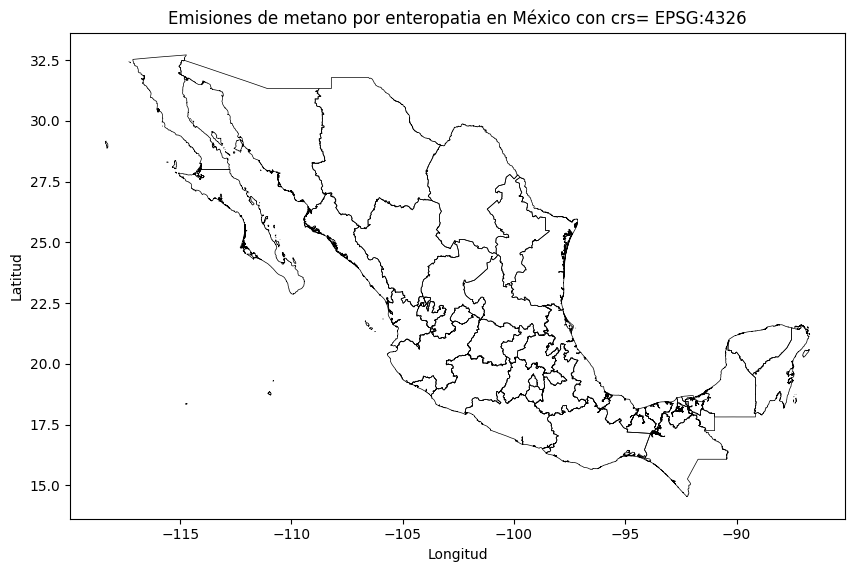

In [25]:
# plot the geometry
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.title(f'Emisiones de metano por enteropatia en México con crs= {estados.crs}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

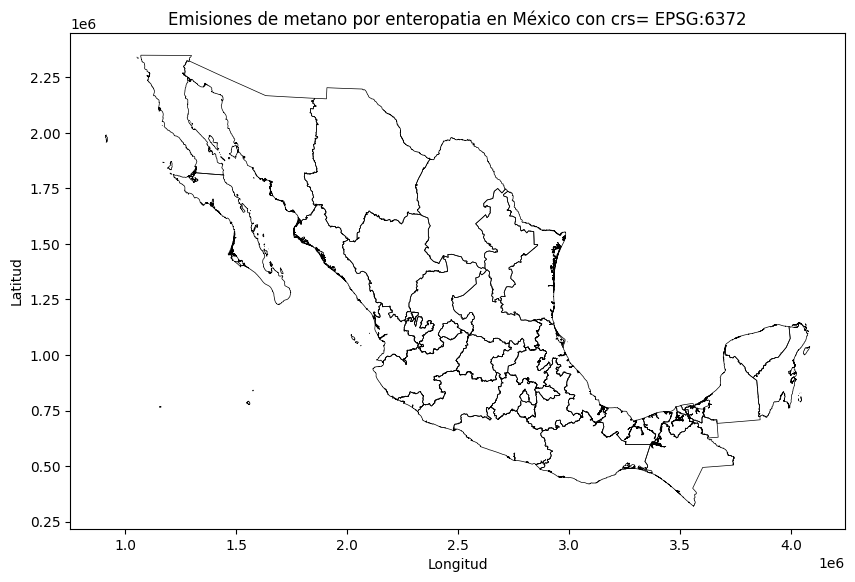

In [26]:
# cambiar la proyección a Lambert Conformal Conic México (p.ej. EPSG:6372).
estados = estados.to_crs(epsg=6372)
# plot the geometry
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.boundary.plot(ax=ax, color='black', linewidth=0.5)
plt.title(f'Emisiones de metano por enteropatia en México con crs= {estados.crs}')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [27]:
estados

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Aguascalientes,MX-AGU,31927357B17004778023462,MEX,ADM1,"MULTIPOLYGON (((2514208.498 1112307.424, 25143..."
1,Baja California,MX-BCN,31927357B35339934753022,MEX,ADM1,"MULTIPOLYGON (((1311406.346 1822297.206, 13118..."
2,Baja California Sur,MX-BCS,31927357B33389180120223,MEX,ADM1,"MULTIPOLYGON (((1658217.258 1385428.864, 16583..."
3,Campeche,MX-CAM,31927357B84428150771724,MEX,ADM1,"MULTIPOLYGON (((3602456.511 739733.752, 360217..."
4,Chiapas,MX-CHP,31927357B65177449444732,MEX,ADM1,"MULTIPOLYGON (((3496262.964 384012.477, 349593..."
5,Chihuahua,MX-CHH,31927357B49801195703560,MEX,ADM1,"MULTIPOLYGON (((2372702.662 1882235.303, 23677..."
6,Coahuila de Zaragoza,MX-COA,31927357B32124965101143,MEX,ADM1,"MULTIPOLYGON (((2331613.993 1630852.462, 23313..."
7,Colima,MX-COL,31927357B75771156097737,MEX,ADM1,"MULTIPOLYGON (((1158658.725 767185.324, 116090..."
8,Distrito Federal,MX-MEX,31927357B79016588373767,MEX,ADM1,"MULTIPOLYGON (((2817139.494 789859.733, 281664..."
9,Durango,MX-DUR,31927357B5285092776894,MEX,ADM1,"MULTIPOLYGON (((2001051.403 1521284.65, 200817..."


In [28]:
# make it geodataframe
municipios_con_estado_sum = gpd.GeoDataFrame(municipios_con_estado_sum, geometry=estados.geometry)

# agregar un indice numerico
municipios_con_estado_sum["idx"] = range(1, len(municipios_con_estado_sum) + 1)

# ponerlo al principio del dataframe
municipios_con_estado_sum = municipios_con_estado_sum[['idx'] + [col for col in municipios_con_estado_sum.columns if col != 'idx']]


municipios_con_estado_sum.to_file('EPSG6372-enteric-fermentation-cattle-pasture-emissions-mexico-june-2024.gpkg', layer='municipios_con_estado_sum', driver='GPKG')
municipios_con_estado_sum

,idx,estado,emissions_quantity,activity,emissions_factor,capacity,index_right,geometry
0,1,Aguascalientes,28.272380,6058.367092,0.004667,6058.367092,0.0,"MULTIPOLYGON (((2514208.498 1112307.424, 25143..."
1,2,Baja California,524.939258,112486.983845,0.004667,112486.983845,1.0,"MULTIPOLYGON (((1311406.346 1822297.206, 13118..."
2,3,Baja California Sur,1060.128413,227170.374160,0.004667,227170.374160,2.0,"MULTIPOLYGON (((1658217.258 1385428.864, 16583..."
3,4,Campeche,85.343471,18287.886614,0.004667,18287.886614,3.0,"MULTIPOLYGON (((3602456.511 739733.752, 360217..."
4,5,Chiapas,14.570645,3122.280977,0.004667,3122.280977,4.0,"MULTIPOLYGON (((3496262.964 384012.477, 349593..."
5,6,Chihuahua,387.016733,82932.157093,0.004667,82932.157093,5.0,"MULTIPOLYGON (((2372702.662 1882235.303, 23677..."
6,7,Coahuila de Zaragoza,404.970264,86779.342362,0.004667,86779.342362,6.0,"MULTIPOLYGON (((2331613.993 1630852.462, 23313..."
7,8,Colima,18.869179,4043.395581,0.004667,4043.395581,7.0,"MULTIPOLYGON (((1158658.725 767185.324, 116090..."
8,9,Distrito Federal,0.052089,11.161858,0.004666,11.161858,8.0,"MULTIPOLYGON (((2817139.494 789859.733, 281664..."
9,10,Durango,138.990483,29783.674852,0.004667,29783.674852,9.0,"MULTIPOLYGON (((2001051.403 1521284.65, 200817..."


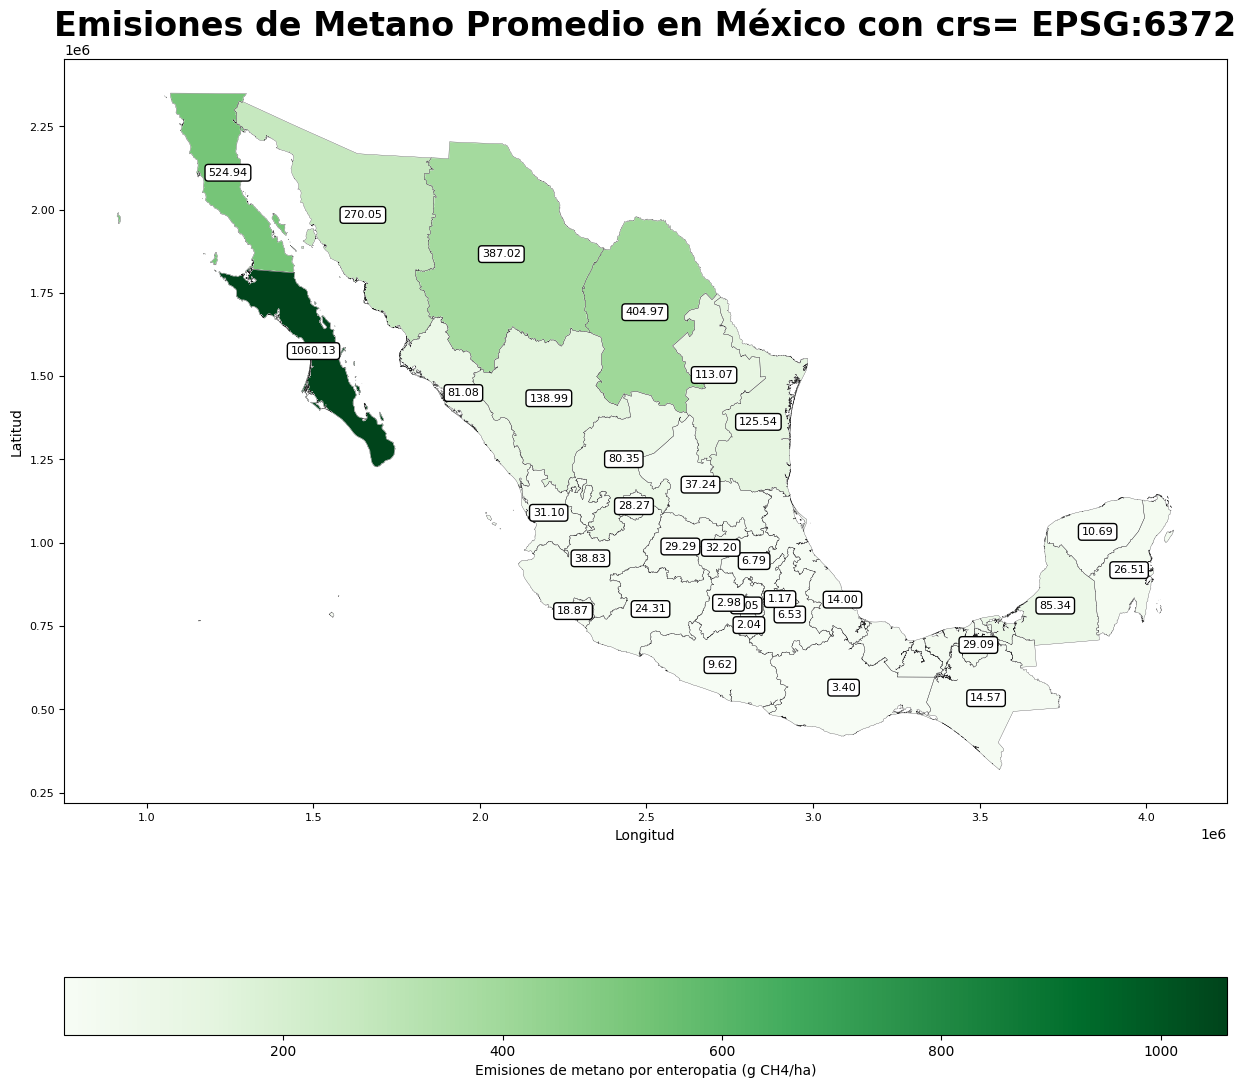

In [58]:
# plot by the mean of the emissions
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
estados.boundary.plot(ax=ax, color='#222222', linewidth=0.2)  
municipios_con_estado_sum.plot(column='emissions_quantity', ax=ax, legend=True, legend_kwds={'label': "Emisiones de metano por enteropatia (g CH4/ha)", 'orientation': "horizontal"}, cmap='Greens', edgecolor='#FFFFFF', linewidth=0.5)
plt.title(f'Emisiones de Metano Promedio en México con crs= {estados.crs}', fontsize=24, weight='bold')
# annotate the mean value with formatted emissions_quantity
for x, y, value in zip(municipios_con_estado_sum.geometry.centroid.x, municipios_con_estado_sum.geometry.centroid.y, municipios_con_estado_sum['emissions_quantity']):
    ax.annotate(f"{value:.2f}", xy=(x, y), fontsize=8, ha='center', va='center', color='black', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# xticks and yticks smaller
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.xlabel('Longitud')
plt.ylabel('Latitud')

# save the figure
plt.savefig('emisiones_municipios.pdf', bbox_inches='tight')
plt.show()